In [11]:
#эта библиотека предоставляет API Python для доступа к набору данных COCO и управления им
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 12.8 MB/s eta 0:00:00


In [12]:
#Импорт необходимых библиотек
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO
from scipy.ndimage import binary_erosion, binary_dilation, gaussian_filter

Изображения. Набор данных COCO включает в себя обширную коллекцию изображений, сгруппированных в разные наборы (обучающие, проверочные и тестовые). Эти изображения составляют основу набора данных, предоставляя визуальные данные для различных задач компьютерного зрения.

Аннотации. Помимо изображений набор данных COCO включает подробные аннотации для каждого изображения. Эти аннотации определяют границы объектов, маски сегментации и метки категорий. Они служат базовыми данными для целей обучения и оценки.

In [13]:
dataDir='/kaggle/input/coco2017/'
dataType='train2017'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
imageDir = '{}/images/{}/'.format(dataDir, dataType)

coco=COCO(annFile)

loading annotations into memory...
Done (t=24.99s)
creating index...
index created!


In [14]:
# Загрузка категории для заданных идентификаторов
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


In [15]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

In [16]:
image_ids = coco.getImgIds()
image_id = image_ids[0]
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


In [17]:
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 391895, 'bbox': [359.17, 146.17, 112.45, 213.57], 'category_id': 4, 'id': 151091}, {'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361.0, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 

In [18]:
# Получение идентификаторов категорий, которые удовлетворяют заданным условиям фильтра
filterClasses = ['laptop', 'tv', 'cell phone']

catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]


In [19]:
catID = 15
print(coco.loadCats(ids=catID))

imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
294912


In [20]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[437140, 462440, 513882, 515319, 520388, 628939, 633463, 1218094, 1459405, 1812352, 1812697, 2002499]


In [ ]:
#Отображение изображения с аннотациями
print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Отобразить указанные аннотации
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()

Annotations for Image ID 294912:
000000294912.jpg


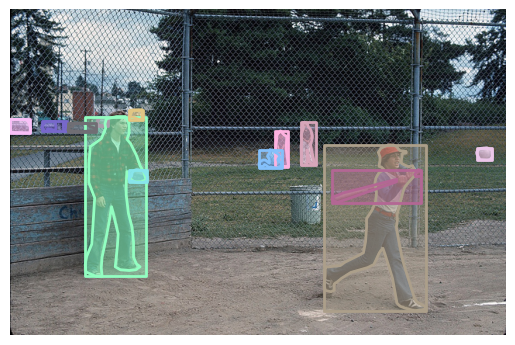

In [22]:
def main():

    # Идентификаторы категорий
    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)

    # Все категории.
    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Получение идентификаторов всех изображений, содержащих объект категории.
    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Выбор одного изображения
    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    # Получение всех аннотации для указанного изображения
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)


    im = plt.imread(imageDir+ coco.loadImgs(img_id)[0]['file_name'])
    # Сохранить изображение и его помеченную версию
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)

    coco.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":

    main()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


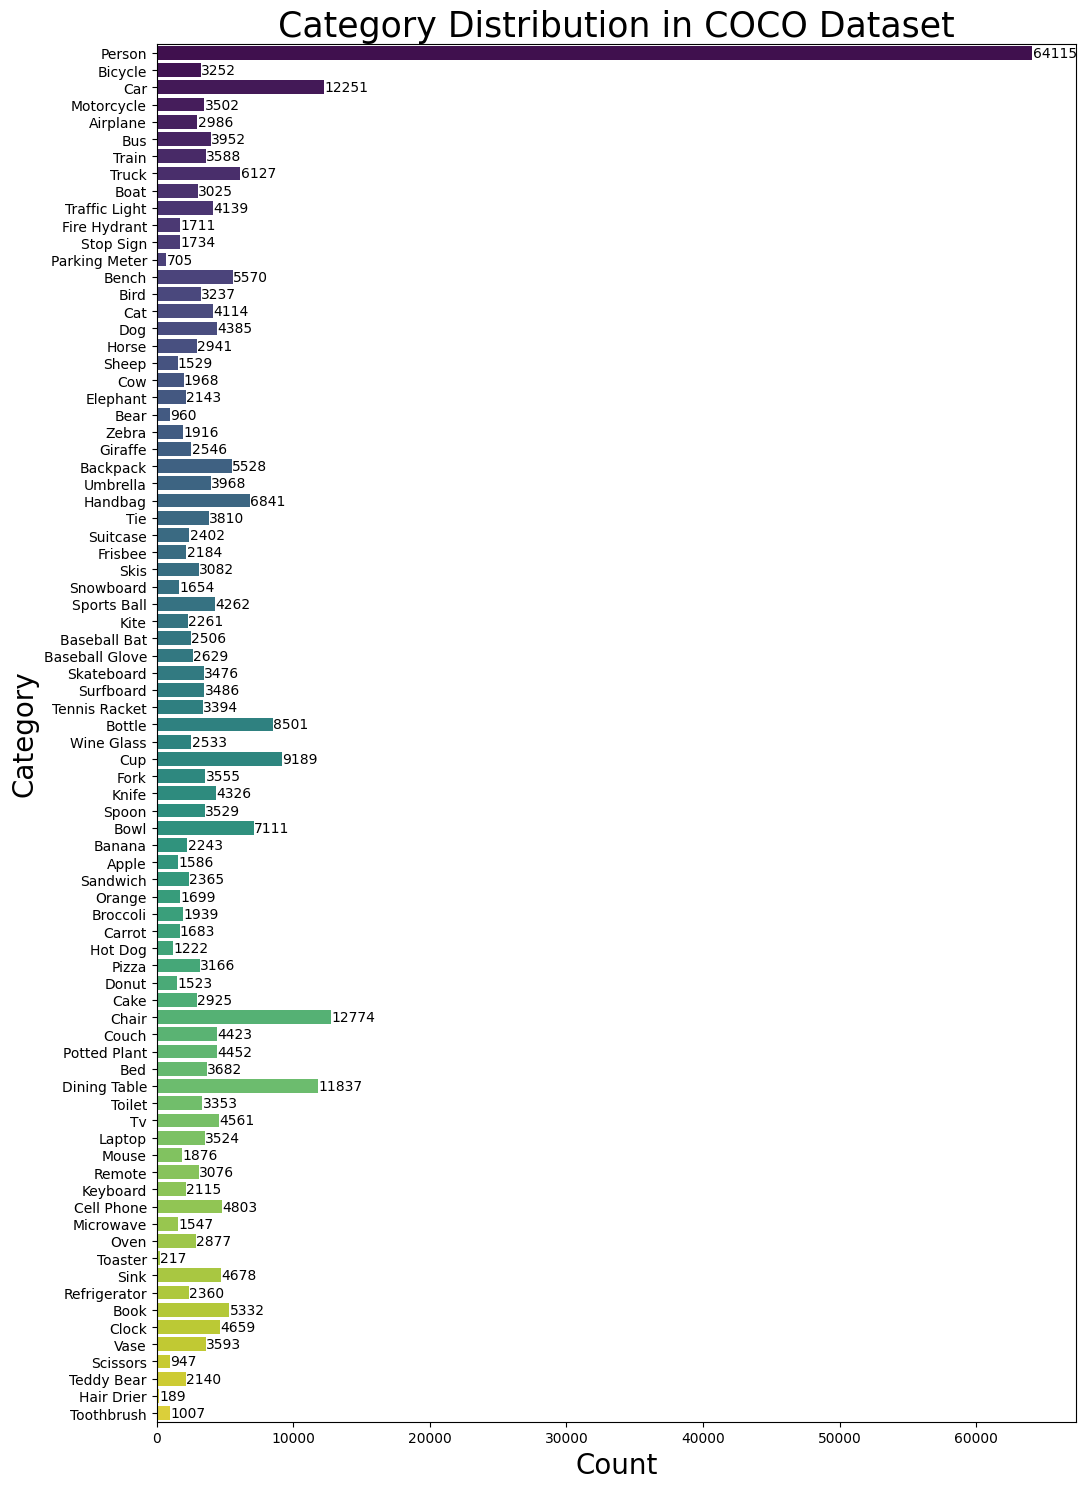

In [23]:
# Визуализация распределения категорий в наборе данных COCO
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

category_names = [cat['name'].title() for cat in cats]

category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]


colors = sns.color_palette('viridis', len(category_names))

plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=colors)

for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Category',fontsize=20)
plt.title('Category Distribution in COCO Dataset',fontsize=25)
plt.tight_layout()
plt.savefig('coco-cats.png',dpi=300)
plt.show()

In [ ]:
#Визуализация распределения категорий в виде круговой диаграммы
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]


plt.figure(figsize=(15, 24.9))


labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {"fontsize": 25, 
               "bbox": {"edgecolor": "white", 
                        "facecolor": "white", 
                        "alpha": 0.7, 
                        "pad": 0.5}
              }

wedges, _, autotexts = plt.pie(category_counts, 
                              autopct='', 
                              startangle=90, 
                              textprops=label_props, 
                              pctdistance=0.85)

legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01), 
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
plt.savefig('coco-dis.png', dpi=300)
plt.show()

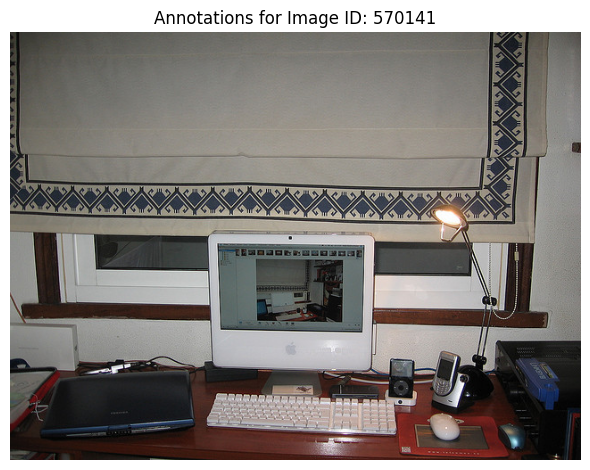

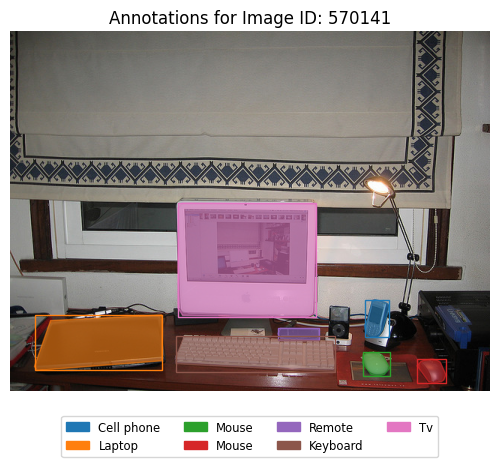

In [25]:
#Отображение отфильтрованных изображений с аннотациями
filterClasses = ['laptop', 'tv', 'cell phone']

catIds = coco.getCatIds(catNms=filterClasses)

imgIds = coco.getImgIds(catIds=catIds)

if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']

        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png',dpi=350)
        plt.show()
        
        plt.imshow(image)
        plt.axis('off')

        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

Генерация масок для сегментации объектов

In [26]:
image_ids = coco.getImgIds()
image_id = image_ids[0] 
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

In [ ]:
image_info = coco.loadImgs(image_id)[0]
image_dir = os.path.join(dataDir, 'images', 'train2017')
image_path = os.path.join(image_dir, image_info['file_name'])

main_image = plt.imread(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')

plt.savefig('main_image.png', dpi=300)

plt.show()

Генерация двоичных масок

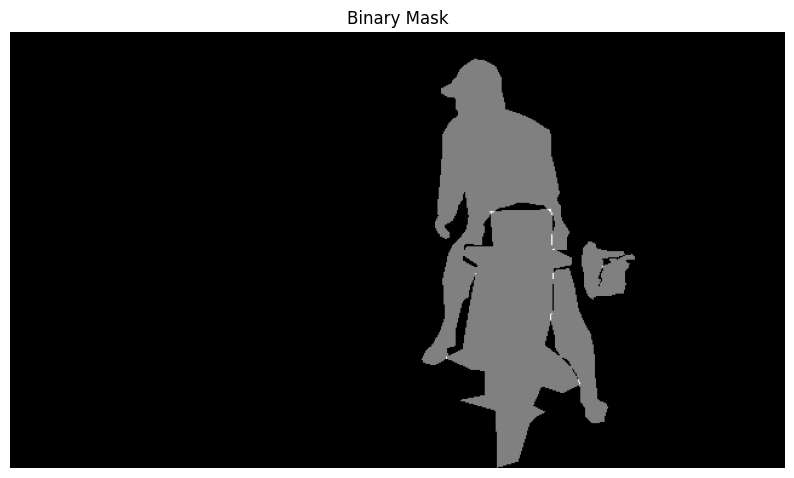

In [28]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

binary_mask = np.zeros((height, width), dtype=np.uint8)

for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    binary_mask += mask

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
plt.savefig('binary_mask.png', dpi=300)
plt.show()

Генерация маски RGB

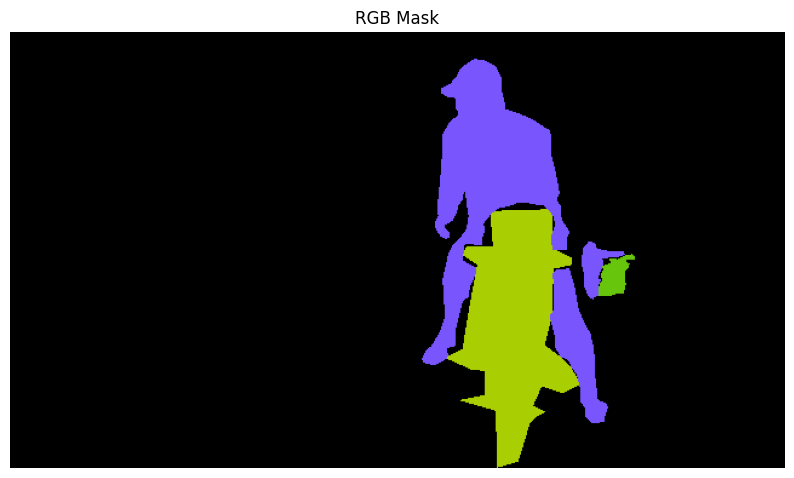

In [29]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
plt.savefig('rgb_mask.png', dpi=300)
plt.show()

Генерация маски Instance Segmentation

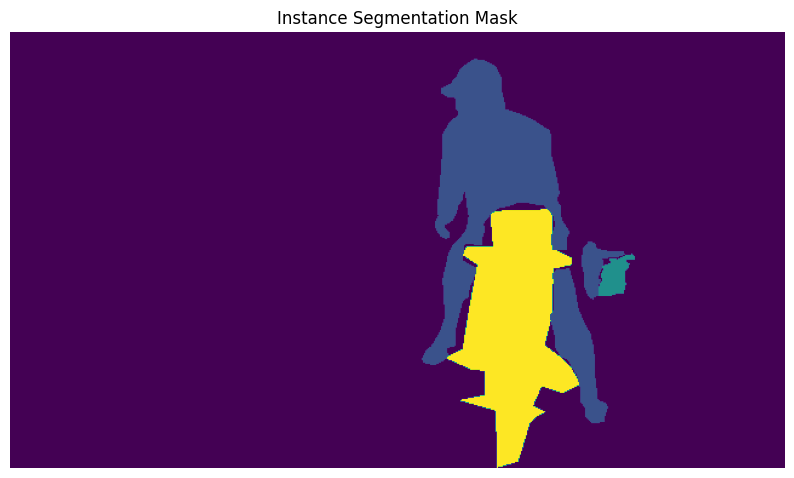

In [30]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

instance_mask = np.zeros((height, width), dtype=np.uint8)

for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    instance_mask[mask == 1] = category_id

plt.figure(figsize=(10,10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
plt.savefig('instance_mask.png', dpi=300)
plt.show()

Создание ограничивающих рамок обнаружения объектов

In [ ]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

plt.savefig('bounding_boxes.png', bbox_inches='tight')

plt.show()

Методы постобработки

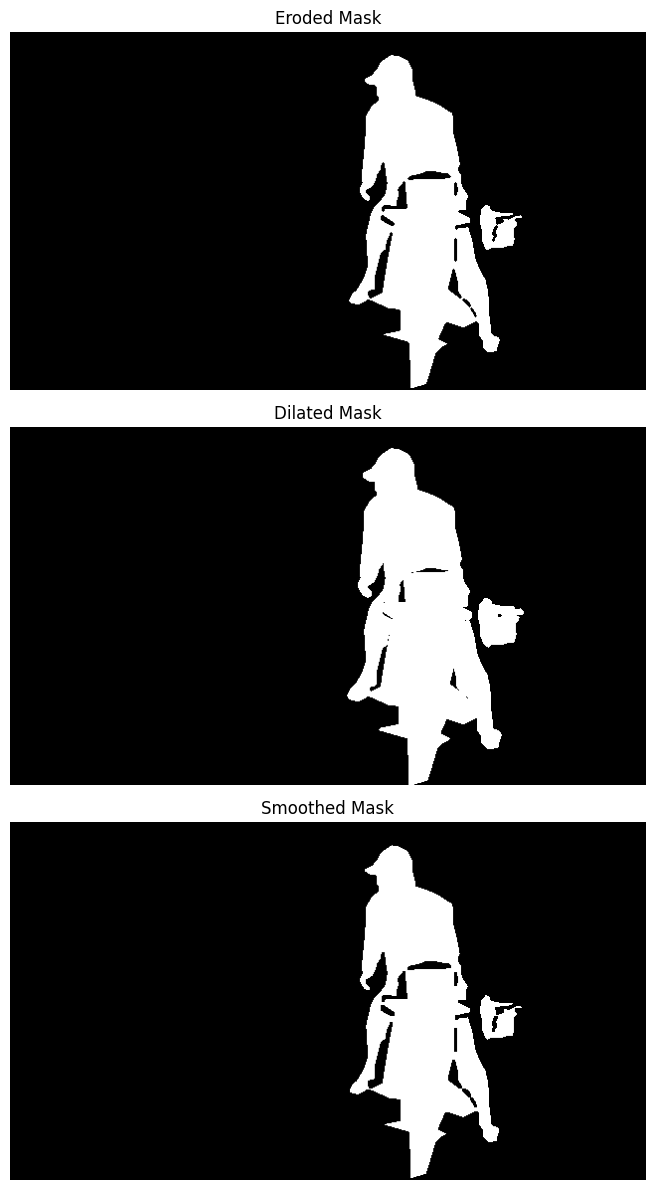

In [32]:
eroded_mask = binary_erosion(binary_mask)

dilated_mask = binary_dilation(binary_mask)

smoothed_mask = gaussian_filter(binary_mask, sigma=.2)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].imshow(eroded_mask, cmap='gray')
axes[0].set_title('Eroded Mask')
axes[0].axis('off')

axes[1].imshow(dilated_mask, cmap='gray')
axes[1].set_title('Dilated Mask')
axes[1].axis('off')

axes[2].imshow(smoothed_mask, cmap='gray')
axes[2].set_title('Smoothed Mask')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('post_processed_masks.png', dpi=300)
plt.show()

Intersection over Union (IoU)¶

In [33]:
gt_mask = binary_mask.astype(bool)  

predicted_mask = smoothed_mask.astype(bool)  

intersection = np.logical_and(gt_mask, predicted_mask)
union = np.logical_or(gt_mask, predicted_mask)
iou = np.sum(intersection) / np.sum(union)

print(f"Intersection over Union (IoU): {iou:.4f}")

Intersection over Union (IoU): 0.9161


In [ ]:
image_id = image_ids[0]

image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(imageDir, image_info['file_name'])
image = plt.imread(image_path)

annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

overlay = image.copy()

for annotation in annotations:
    mask = coco.annToMask(annotation)
    
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)
    
    overlay[mask == 1] = color

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

plt.tight_layout()

plt.savefig('mask_visualization.png', dpi=300)

plt.show()

In [35]:
from tensorflow import keras


ANNOTATION_FILE_TRAIN = '/kaggle/input/coco2017/annotations/instances_train2017.json'
ANNOTATION_FILE_VAL = '/kaggle/input/coco2017/annotations/instances_val2017.json'

classes = ['person']

coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

print(len(train_images_person), len(val_images_person))

train_images_person = ["{0:012d}.jpg".format(ids) for ids in imgIds_train]

val_images_person = ["{0:012d}.jpg".format(ids) for ids in imgIds_val]

len(os.listdir("/kaggle/input/coco2017/images/val2017"))

!mkdir mask_train_2017

count = 0 

for ID in imgIds_train:

    file_path = "/kaggle/working/mask_train_2017/{0:012d}.jpg".format(ID)

    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

!mkdir mask_val_2017

count = 0

for ID in imgIds_val:

    file_path = "/kaggle/working/mask_val_2017/{0:012d}.jpg".format(ID)

    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1


class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)
        
        return np.array(batch_images), np.array(batch_masks)


images_path = '/kaggle/input/coco2017/images/train2017'
masks_path = '/kaggle/working/mask_train_2017'
batch_size = 8

train_generator = CustomDataGenerator(images_path, masks_path, batch_size)

loading annotations into memory...
Done (t=22.46s)
creating index...
index created!
loading annotations into memory...
Done (t=0.87s)
creating index...
index created!
64115 1
2693 1
6000 600


In [56]:
print(len(os.listdir("/kaggle/input/coco2017/images/train2017")))

print(len(os.listdir("/kaggle/working/mask_train_2017")))

print(len(os.listdir("/kaggle/input/coco2017/images/val2017")))

print(len(os.listdir("/kaggle/working/mask_val_2017")))

In [ ]:
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()

Mask Image Shape: (640, 428)
Main Image Shape: (640, 428, 3)


Обучение модели U-Net сегментации изображений

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *

def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv


def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    
    return conv

def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = keras.models.Model(inputs = inputs , outputs = output)
    
    
    return model
    
model = UNet(input_shape = (128,128,3))
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.utils import plot_model

# Визуализация модели
plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

In [44]:
images_path = '/kaggle/input/coco2017/images/val2017'
masks_path = '/kaggle/working/mask_val_2017'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

In [45]:
from keras.models import clone_model
# создание модели из весов нескольких моделей
def fed_avg(members, weights):
    # определить, сколько слоев необходимо усреднить
    n_layers = len(members[0].get_weights())
    # создать набор средних весов модели
    avg_model_weights = list()
    for layer in range(n_layers):
        # слой с каждой модели
        layer_weights = np.array([model.get_weights()[layer] for model in members])
        # средневзвешенное значение весов для этого слоя
        avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        # сохранять средние веса слоев
        avg_model_weights.append(avg_layer_weights)
    # создать новую модель с той же структурой
    model = clone_model(members[0])
    # установка весов в новой
    model.set_weights(avg_model_weights)
    model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [48]:
import datetime
def run_federated_rounds(clinet_perround=4, no_of_rounds=2):
    per_round_fedavg_models=[]
    stats=[]
    for i in range(no_of_rounds):
        round_start=datetime.datetime.now()
        this_round_client_trained_models=[]
        sample_size=[]
        print ('***********Federated Round {} **************'.format(i+1))
        for j in range(clinet_perround):
            print ('')
            print ('-------------------------')
            print ('client {} training'.format(j+1))
            if i==0:
                client_model=UNet(input_shape = (128,128,3))
            else:
                client_model=this_round_fed_avg_model

            model.fit(train_generator,validation_data = val_generator , epochs=3)
            sample_size.append(val_generator['image_path'].count())
            stats.append({'round': i, 'client': j, 'test_IOU': temp_tv})
            this_round_client_trained_models.append(model)
    
        n_models = len(this_round_client_trained_models)
        wt_sum=sum(sample_size)
        weights=[i/wt_sum for i in sample_size]
        print ("models will be weighted as per below ratio based on their data contribution")
        print (weights)
        this_round_fed_avg_model = fed_avg(this_round_client_trained_models, weights)   
        
        orig_test_ids = list(test.image_path)
        orig_test_mask = list(test.mask_path)
        orig_test_data = val_generator()
        _, tv = this_round_fed_avg_model.evaluate(orig_test_data)
        print("FedAvg Segmentation IOU is {:.2f}%".format(tv*100))
        
        per_round_fedavg_models.append({'round': i, 'fed_avg_model': this_round_fed_avg_model, 'fed_avg_test_IOU': tv})
        round_end=datetime.datetime.now()
        
        print ('Round {} computation done in : {}'.format(i, str(round_end-round_start)))
        print (stats)
    return (per_round_fedavg_models, stats)

In [55]:
(per_round_fedavg_models, stats)=run_federated_rounds()

***********Federated Round 1 **************

-------------------------
client 1 training
Train size is 809, valid size is 83 & test size is 83
Epoch 1/3
50/50 [==============================] - 11s 154ms/step - loss: 0.2740 - iou_coef: 0.0337 - val_loss: 0.0370 - val_iou_coef: 0.0315

Epoch 00001: val_loss improved from inf to 0.03699, saving model to ResUNet-segModel-weights_round0_clinet0.hdf5
Epoch 2/3
50/50 [==============================] - 6s 125ms/step - loss: 0.0297 - iou_coef: 0.0670 - val_loss: 0.0294 - val_iou_coef: 0.0666

Epoch 00002: val_loss improved from 0.03699 to 0.02940, saving model to ResUNet-segModel-weights_round0_clinet0.hdf5
Epoch 3/3
50/50 [==============================] - 6s 122ms/step - loss: 0.0217 - iou_coef: 0.1050 - val_loss: 0.0224 - val_iou_coef: 0.1045

Epoch 00003: val_loss improved from 0.02940 to 0.02242, saving model to ResUNet-segModel-weights_round0_clinet0.hdf5
5/5 [==============================] - 1s 107ms/step - loss: 0.0228 - iou_coef: 0.1

Прогнозирование и визуализация масок сегментации

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


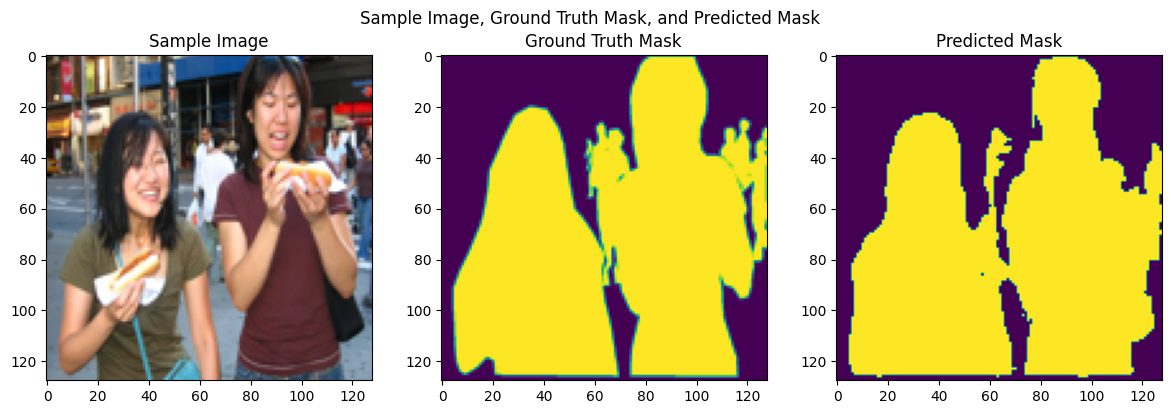

In [32]:
sample_images, sample_masks = val_generator[0]

predictions = per_round_fedavg_models.predict(sample_images)

threshold = 0.5
thresholded_predictions = (predictions > threshold).astype(np.uint8)

idx = np.random.randint(0, sample_images.shape[0])

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

plt.tight_layout()

plt.show()